In [ ]:
# https://dinosaurgame.net/ play game on this site only

In [9]:
!pip install keyboard

     ---------------------------------------- 58.1/58.1 kB ? eta 0:00:00


In [1]:
from PIL import ImageGrab
import keyboard

In [2]:
import cv2
import pyautogui
import numpy as np

In [79]:
i=165
j=145
while True:
    try:
        if keyboard.is_pressed("up"):
            image = ImageGrab.grab((500,500,800,800))
            image.save("./images/up"+f"{i}.png")
            i=i+1
        elif keyboard.is_pressed("q"):
            image = ImageGrab.grab((500,500,800,800))
            image.save("./images/down"+f"{j}.png")
            j=j+1            
        elif keyboard.is_pressed("esc"):
            break
        else:
            pass
    except:
        break

In [196]:
x_up=np.zeros((0,300,300))
for i in range(397):
    image=cv2.imread("./images/up"+f"{i}.png")
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,image = cv2.threshold(image,90,255,cv2.THRESH_BINARY)
    image=np.array(image).reshape((1,300,300))

    x_up= np.vstack([x_up, image])

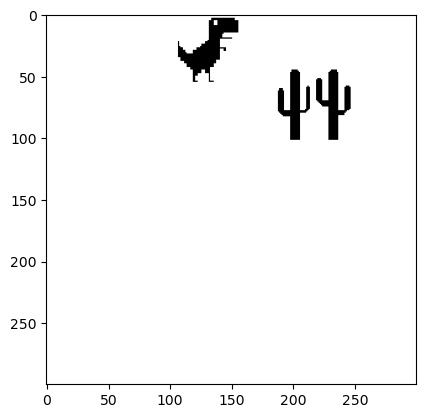

In [197]:
import matplotlib.pyplot as plt
plt.imshow(x_up[50,:,:],cmap='gray')

In [198]:
x_up.shape

(397, 300, 300)

In [199]:
x_down=np.zeros((0,300,300))
for i in range(414):
    try:
        image=cv2.imread("./images/down"+f"{i}.png")
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#         image = cv2.resize(image, (227,227),interpolation='INTER_AREA').reshape((1, 277, 227))
        ret,image = cv2.threshold(image,90,255,cv2.THRESH_BINARY)
        image=np.array(image).reshape((1,300,300))
        x_down= np.vstack([x_down, image])
    except:
        pass

In [200]:
x_down.shape

(366, 300, 300)

In [201]:
y=np.hstack([np.zeros(397),np.ones(366)])

In [202]:
y.shape

(763,)

In [203]:
x=np.vstack([x_up,x_down])

In [204]:
x.shape

(763, 300, 300)

In [205]:
val_x=x[300:500,:,:]
val_y=y[300:500]

In [206]:
import tensorflow as tf
from tensorflow import keras

In [207]:
# model=keras.models.Sequential([
#         keras.layers.Conv2D(96,kernel_size=11,strides=4,activation='relu',input_shape=(300,300,1)),
#         keras.layers.MaxPool2D(pool_size=3,strides=3),
#         keras.layers.Conv2D(256,kernel_size=5,padding='same',activation='relu'),
#         keras.layers.MaxPool2D(pool_size=3,strides=2),
#         keras.layers.Conv2D(384,kernel_size=3,padding='same',activation='relu'),
#         keras.layers.Conv2D(384,kernel_size=3,padding='same',activation='relu'),
#         keras.layers.MaxPool2D(pool_size=3,strides=2),
#         keras.layers.Conv2D(256,kernel_size=3,padding='same',activation='relu'),
#         keras.layers.Flatten(),
#         keras.layers.Dense(4096,activation='relu'),
#         keras.layers.Dropout(0.5),
#         keras.layers.Dense(4096,activation='relu'),
#         keras.layers.Dropout(0.5),
#         keras.layers.Dense(2,activation='sigmoid')
    
# ]) #max score=348

In [208]:
model=keras.models.Sequential([
        keras.layers.Conv2D(96,kernel_size=11,strides=4,activation='relu',input_shape=(300,300,1)),
        keras.layers.MaxPool2D(pool_size=3,strides=3),
        keras.layers.Conv2D(256,kernel_size=5,padding='same',activation='relu'),
        keras.layers.MaxPool2D(pool_size=3,strides=2),
        keras.layers.Conv2D(384,kernel_size=3,padding='same',activation='relu'),
        keras.layers.Conv2D(384,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D(pool_size=3,strides=2),
        keras.layers.Conv2D(256,kernel_size=3,padding='same',activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(4096,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(2,activation='sigmoid')
    
])

In [209]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [210]:
model.fit(x, y, epochs=5, validation_data=(val_x, val_y))


Epoch 1/5
24/24 [==============================] - 31s 1s/step - loss: 29.6744 - accuracy: 0.7221 - val_loss: 0.3721 - val_accuracy: 0.8600
Epoch 2/5
24/24 [==============================] - 28s 1s/step - loss: 0.2928 - accuracy: 0.9083 - val_loss: 0.3378 - val_accuracy: 0.8850
Epoch 3/5
24/24 [==============================] - 28s 1s/step - loss: 0.2843 - accuracy: 0.9109 - val_loss: 0.3443 - val_accuracy: 0.8800
Epoch 4/5
24/24 [==============================] - 28s 1s/step - loss: 0.2543 - accuracy: 0.9122 - val_loss: 0.3380 - val_accuracy: 0.8650
Epoch 5/5
24/24 [==============================] - 29s 1s/step - loss: 0.2698 - accuracy: 0.9135 - val_loss: 0.2938 - val_accuracy: 0.8900


In [165]:
model.evaluate(x_down,np.ones(366))

12/12 [==============================] - 2s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [212]:
while True:
    if keyboard.is_pressed('q'):
        image = ImageGrab.grab((500,500,800,800))
        image= cv2.cvtColor(np.array(image),cv2.COLOR_BGR2GRAY)
        ret,image = cv2.threshold(image,90,255,cv2.THRESH_BINARY)
        image=np.resize(image,(1,300,300))
        result=np.argmax(model.predict(image))
        if result==0:
            keyboard.press_and_release('up')
        else:
            pass
            
    elif keyboard.is_pressed('esc'):
        break
    else:
        pass

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step
